# Linearisation Exercises

Natasha Watkins

In [1]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1

In [2]:
α = 0.35
β = 0.98
ρ_z = 0.95
σ = 0.02
A = α * β
K = A**(1/(1 - α))

In [3]:
F = (α * K**(α - 1)) / (K**α - K)
G = -(α * K**(α - 1) * (α + K**(α - 1))) / (K**α - K)
H = (α**2 * K**(2 * (α - 1))) / (K**α - K)
L = -(α * K**(2 * (α - 1))) / (K**α - K)
M = (α**2 * K**(2 * (α - 1))) / (K**α - K)

P = (-G - np.sqrt(G**2 - 4 * F * H)) / (2 * F)
Q = -(L * ρ_z + M) / (F * ρ_z + F * P + G)

# Create K and z grids
K_t_grid = np.linspace(1.5, 10)
z_grid = np.linspace(-1, 1)

# Create a meshgrid
K_t, z = np.meshgrid(K_t_grid, z_grid)

# Calculate K_prime across the grid
K_prime = lambda K, Z: K + P * (K_t - K) + Q * z

y = K_prime(K_t, z)

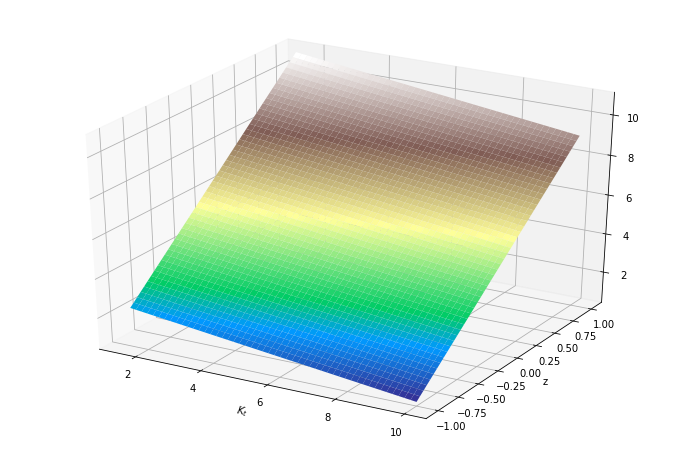

In [4]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_t, z, y.T, cmap='terrain')
ax.set(xlabel='$K_t$', ylabel='z')
plt.show()

## Exercise 4

In [5]:
# Parameters
γ = 2.5
ξ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

In [6]:
def solve_ss(params, γ, ξ, β, α, a, δ, z, τ):
    k, l = params
    w = (1 - α) * k**α * (l * np.exp(z))**(-α)  # SS wage
    r = α * k**(α - 1) * (l * np.exp(z))**(1 - α)  # SS interest rate
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + T
    eq1 = β * ((r - δ) * (1 - τ) + 1) - 1
    eq2 = c**(-γ) * w * (1 - τ) - a * (1 - l)**(-ξ)
    return eq1, eq2

In [7]:
ss = root(solve_ss, 0.2 * np.ones(2), args=(γ, ξ, β, α, a, δ, z, τ))
k_bar, l_bar, = ss.x
k_bar, l_bar

(4.225229027461345, 0.5797914532002376)

In [8]:
y_bar = k_bar**α * l_bar**(1 - α) * np.exp(z)
y_bar

1.2832261089590185

In [9]:
i_bar = δ * k_bar
i_bar

0.4225229027461345

## Exercise 5

In [10]:
def return_ss(params_vec):
    
    γ, ξ, β, α, a, δ, z, τ = params_vec
    
    ss = root(solve_ss, 0.2 * np.ones(2), args=(γ, ξ, β, α, a, δ, z, τ))
    k_bar, l_bar, = ss.x
    y_bar = k_bar**α * l_bar**(1 - α) * np.exp(z)
    i_bar = δ * k_bar
    w_bar = (1 - α) * k_bar**α * (l_bar * np.exp(z))**(-α)
    r_bar = α * k_bar**(α - 1) * (l_bar * np.exp(z))**(1 - α)
    T_bar = τ * (w_bar * l_bar + (r_bar - δ) * k_bar)
    c_bar = (1 - τ) * (w_bar * l_bar + (r_bar - δ) * k_bar) + T_bar
    
    return np.array([k_bar, l_bar, y_bar, i_bar, 
                     w_bar, r_bar, T_bar, c_bar])

In [11]:
params = np.array([γ, ξ, β, α, a, δ, z, τ])
k_bar, l_bar, y_bar, i_bar, w_bar, r_bar, T_bar, c_bar = return_ss(params)

In [12]:
ɛ = 1e-6
derivatives = np.zeros((len(params), len(params)))
ss = return_ss(params)

for i in range(len(params)):
    params_temp = params.copy()
    params_temp[i] += ɛ
    derivatives[:, i] = (return_ss(params_temp) - ss) / ɛ

In [13]:
print(derivatives.round(1))

[[  0.1  -0.8  65.4  26.   -1.8 -48.3   4.   -2.3]
 [  0.   -0.1   0.3  -0.8  -0.3   1.3  -0.   -0.1]
 [  0.   -0.2   8.3   4.7  -0.6  -4.1   1.7  -0.5]
 [  0.   -0.1   6.5   2.6  -0.2  -0.6   0.4  -0.2]
 [  0.   -0.    8.    4.4   0.   -7.3  -0.   -0.2]
 [ -0.    0.   -1.1  -0.   -0.    1.    0.    0. ]
 [  0.   -0.    0.1   0.1  -0.   -0.2   0.    0.8]
 [  0.   -0.2   1.8   2.1  -0.4  -3.5   0.   -0.2]]


## Exercise 6

In [14]:
from collections import namedtuple


params = ["a", "alpha", "beta", "delta", "gamma", "rho", "sigma", "tau", "xi"]
BaselineModel = namedtuple("BaselineModel", params)

m = BaselineModel(0.50, 0.40, 0.98, 0.10, 2.50, 0.90, 0.02, 0.05, 1.5)

In [15]:
def u(m, c, l):
    uc = (c**(1.0 - m.gamma) - 1.0) / (1.0 - m.gamma)
    ul = m.a * ((1.0 - l)**(1.0 - m.xi) - 1.0) / (1.0 - m.xi)
    return uc + ul

def du_dc(m, c, l):
    return c**(-m.gamma)

def du_dl(m, c, l):
    return - m.a * (1.0 - l)**(-m.xi)

def f(m, k, l, z):
    return k**m.alpha * (l * np.exp(z))**(1.0 - m.alpha)

def df_dk(m, k, l, z):
    return m.alpha * (l/k * np.exp(z))**(1.0 - m.alpha)

def df_dl(m, k, l, z):
    return (1.0 - m.alpha) * np.exp(z)**(1.0 - m.alpha) * (k / l)**m.alpha

In [16]:
def Definitions(m, ktp1, kt, lt, zt):
    wt = df_dl(m, kt, lt, zt)
    rt = df_dk(m, kt, lt, zt)
    Tt = m.tau * (wt*lt + (rt - m.delta)*kt)
    ct = (1 - m.tau) * (wt*lt + (rt - m.delta)*kt) + kt + Tt - ktp1

    ct = max(ct, 1e-8)

    return ct, rt, Tt, wt


def CharacteristicEquations(m, ktp2, ltp1, ktp1, lt, kt, ltm1, ztp1, zt):
    ct, rt, Tt, wt = Definitions(m, ktp1, kt, lt, zt)
    ctp1, rtp1, Ttp1, wtp1 = Definitions(m, ktp2, ktp1, ltp1, ztp1)
    rr_tp1 = (rtp1 - m.delta)*(1 - m.tau) + 1.0

    intertemporal_ee = du_dc(m, ct, lt) - m.beta*du_dc(m, ctp1, ltp1)*rr_tp1
    intratemporal_ee = du_dl(m, ct, lt) + du_dc(m, ct, lt)*wt*(1.0 - m.tau)

    return np.array([intertemporal_ee, intratemporal_ee])

In [17]:
def solve_ss(m):
    solve_me = lambda x: CharacteristicEquations(m, x[0], x[1], x[0], x[1], x[0], x[1], 0.0, 0.0)
    sol = root(solve_me, np.array([0.5, 0.85]))

    return sol.x

In [18]:
kbar, lbar = solve_ss(m)

cbar, rbar, Tbar, wbar = Definitions(m, kbar, kbar, lbar, 0.0)

In [19]:
def derivative(f, x, xtilde):
    return (f(x) - f(xtilde)) / np.sum(x - xtilde)


def linearize(m, kbar, lbar, eps=1e-6):
    # Compute ss gamma
    x = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
    Gamma_ss = CharacteristicEquations(m, kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0)

    # Allocate space for derivative matrix
    neq = len(Gamma_ss)
    Dmat = np.empty((neq, 8))

    CEsplat = lambda x: CharacteristicEquations(m, *list(x))
    for i in range(8):
        xtilde = np.array([kbar, lbar, kbar, lbar, kbar, lbar, 0.0, 0.0])
        xtilde[i] += eps
        Dmat[:, i] = derivative(CEsplat, x, xtilde)

    F = Dmat[:, :2]
    G = Dmat[:, 2:4]
    H = Dmat[:, 4:6]
    L = Dmat[:, 6]
    M = Dmat[:, 7]

    return F, G, H, L, M

In [20]:
F, G, H, L, M = linearize(m, kbar, lbar)
F

array([[-4.22623769,  5.44191867],
       [-0.        , -0.        ]])

In [21]:
G

array([[  8.5666152 ,  -5.61221554],
       [  5.33163184, -14.89888287]])

In [22]:
H

array([[-4.31700912, -0.        ],
       [-5.27237248, -0.        ]])

In [23]:
L

array([ 3.1551835, -0.       ])

In [24]:
M

array([-3.25392039, -3.00365571])

In [25]:
N = ρ_z * np.eye(2)
N

array([[0.95, 0.  ],
       [0.  , 0.95]])

Solutions for P and Q...

In [26]:
def solve_P(P, F, G, H, M):
    P = P.reshape((2, 2))
    eq1 = F @ P @ P + G @ P + H
    return eq1.flatten()

In [27]:
x0 = np.zeros(4)
P = root(solve_P, x0, args=(F, G, H, M)).x.reshape(2, 2)

In [28]:
P

array([[ 0.91529275,  0.        ],
       [-0.02633543,  0.        ]])

In [29]:
def solve_Q(Q, F, ρ_z, P, G, L):
    return F @ Q * ρ_z + (F @ P + G) @ Q + (L * ρ_z + M)

In [30]:
x0 = np.zeros(2)
Q = root(solve_Q, x0, args=(F, ρ_z, P, G, L)).x
Q

array([ 0.43819003, -0.04479449])

## Exercise 7

In [31]:
from numba import njit

In [32]:
N_sim = 10_000
T = 250
σ_z = np.sqrt(0.0004)

@njit
def generate_series(N_sim, T, σ_z):

    z_vec = np.zeros(T)
    X_vec = np.zeros((T, 2))
    k_vec = np.zeros((T, N_sim))
    l_vec = np.zeros((T, N_sim))

    for n in range(N_sim):    
        for i in range(1, T):            
            z_vec[i] = ρ_z * z_vec[i-1] + np.random.normal() * σ_z
            X_vec[i] = P @ X_vec[i-1, :] + Q * z_vec[i]

        k_vec[:, n] = np.exp(X_vec[:, 0]) * kbar
        l_vec[:, n] = np.exp(X_vec[:, 1]) * lbar
        
    return k_vec, l_vec, z_vec

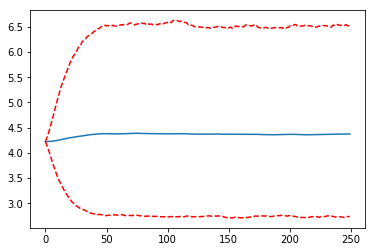

In [33]:
k_vec, l_vec, z_series = generate_series(N_sim, T, σ_z)

k_series = k_vec.mean(axis=1)
high_k = np.percentile(k_vec, 95, axis=1)
low_k = np.percentile(k_vec, 5, axis=1)

plt.plot(k_series)
plt.plot(high_k, 'r--')
plt.plot(low_k, 'r--')
plt.show()

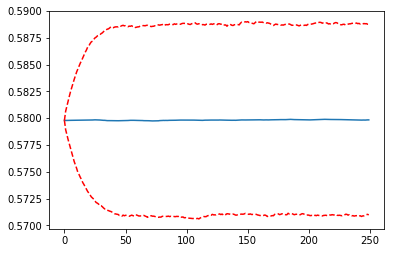

In [34]:
l_series = l_vec.mean(axis=1)
high_l = np.percentile(l_vec, 95, axis=1)
low_l = np.percentile(l_vec, 5, axis=1)

plt.plot(l_series)
plt.plot(high_l, 'r--')
plt.plot(low_l, 'r--')
plt.show()

In [35]:
y_series = k_series**α * l_series**(1 - α) * np.exp(z_series)             # Output series
i_series = δ * k_series                                                   # Investment series
w_series = (1 - α) * k_series**α * (l_series * np.exp(z_series))**(-α)    # Wage series
r_series = α * k_series**(α - 1) * (l_series * np.exp(z_series))**(1 - α) # Interest rate series
T_series = τ * (w_series * l_series + (r_series - δ) * k_series)
c_series = (1 - τ) * (w_series * l_series + (r_series - δ) * k_series) + T_series

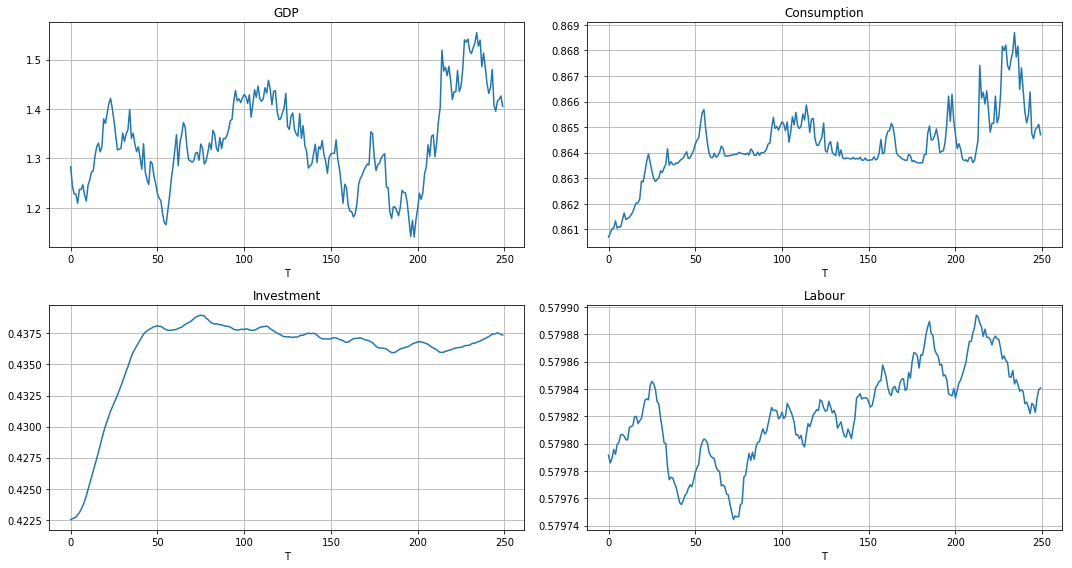

In [36]:
to_plot = [y_series, c_series, i_series, l_series]
titles = ['GDP', 'Consumption', 'Investment', 'Labour']

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for ax, plot, title in zip(axes.flatten(), to_plot, titles):
    ax.plot(plot)
    ax.set(title=title, xlabel='T')
    ax.grid()

plt.tight_layout()
plt.show()

## Exercise 8

In [37]:
k_means = k_vec.mean(axis=0)
k_stds = k_vec.std(axis=0)
l_means = l_vec.mean(axis=0)
l_stds = l_vec.mean(axis=0)

In [38]:
vectors = ['Capital', 'Labour']

for vec, vector in zip([k_vec, l_vec], vectors):
    print('=' * 50)
    print(vector)
    print('=' * 50)
    print(f"Average mean: {vec.mean(axis=0).mean():.3f}")
    print(f"Standard deviation of mean: {vec.mean(axis=0).std():.3f}")
    print(f"Average standard deviation: {vec.std(axis=0).mean():.3f}")
    print(f"Standard deviation of standard deviation: {vec.std(axis=0).std():.3f}")
    print(f"Average cefficient of variation: {(vec.mean(axis=0) / vec.std(axis=0)).mean():.2f}")
    print(f"Standard deviation of cefficient of variation: {(vec.mean(axis=0) / vec.std(axis=0)).std():.2f}")
    print(f"Autocorrelation: {np.corrcoef(k_vec[1:], k_vec[:-1]).mean():.2f}")

Capital
Average mean: 4.360
Standard deviation of mean: 0.533
Average standard deviation: 0.939
Standard deviation of standard deviation: 0.305
Average cefficient of variation: 5.04
Standard deviation of cefficient of variation: 1.44
Autocorrelation: 0.22
Labour
Average mean: 0.580
Standard deviation of mean: 0.002
Average standard deviation: 0.004
Standard deviation of standard deviation: 0.001
Average cefficient of variation: 140.07
Standard deviation of cefficient of variation: 38.29
Autocorrelation: 0.22


## Exercise 9

In [39]:
N_sim = 10_000
T = 40
σ_z = np.sqrt(0.0004)

@njit
def generate_irf(N_sim, T, σ_z):

    z_vec = np.zeros(T)
    z_vec[0] = 1
    X_vec = np.zeros((T, 2))
    k_vec = np.zeros((T, N_sim))
    l_vec = np.zeros((T, N_sim))

    for n in range(N_sim):    
        for i in range(1, T):            
            z_vec[i] = ρ_z * z_vec[i-1] + np.random.normal() * σ_z
            X_vec[i] = P @ X_vec[i-1, :] + Q * z_vec[i]

        k_vec[:, n] = np.exp(X_vec[:, 0]) * kbar
        l_vec[:, n] = np.exp(X_vec[:, 1]) * lbar
        
    return k_vec, l_vec, z_vec

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


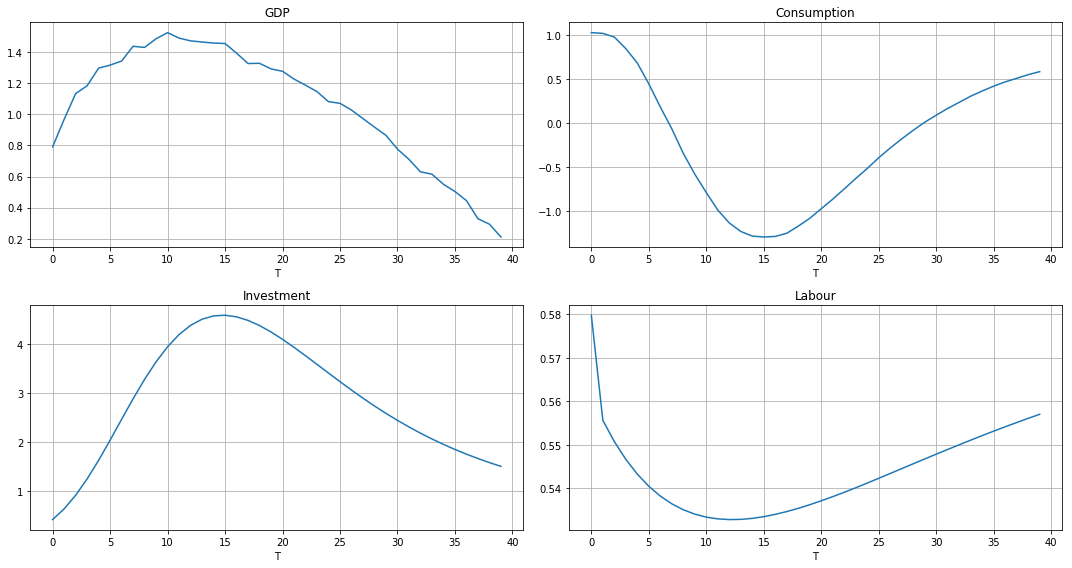

In [40]:
k_vec, l_vec, z_series = generate_irf(N_sim, T, σ_z)
k_series = k_vec.mean(axis=1)
l_series = l_vec.mean(axis=1)

y_series = k_series**α * l_series**(1 - α) * np.exp(z_series)             # Output series
i_series = δ * k_series                                                   # Investment series
w_series = (1 - α) * k_series**α * (l_series * np.exp(z_series))**(-α)    # Wage series
r_series = α * k_series**(α - 1) * (l_series * np.exp(z_series))**(1 - α) # Interest rate series
T_series = τ * (w_series * l_series + (r_series - δ) * k_series)
c_series = (1 - τ) * (w_series * l_series + (r_series - δ) * k_series) + T_series

y_change = np.log(y_series - y_bar)
c_change = np.log(c_series - c_bar)
i_change = np.log(i_series - i_bar)
l_change = np.log(l_series - l_bar)

to_plot = [y_change, c_series, i_series, l_series]
titles = ['GDP', 'Consumption', 'Investment', 'Labour']

fig, axes = plt.subplots(2, 2, figsize=(15, 8))

for ax, plot, title in zip(axes.flatten(), to_plot, titles):
    ax.plot(plot)
    ax.set(title=title, xlabel='T')
    ax.grid()

plt.tight_layout()
plt.show()